# Week 12 - Milestone Two week

# 1. Lesson: no lesson this week.  Milestone Two is due!

# 2. Weekly graph question

Suppose you plot the number visitors to a museum over the seven days of a week; then again the following week.  Can you suggest the advantages and disadvantages of the following two ways of presenting the data?

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of visitors')

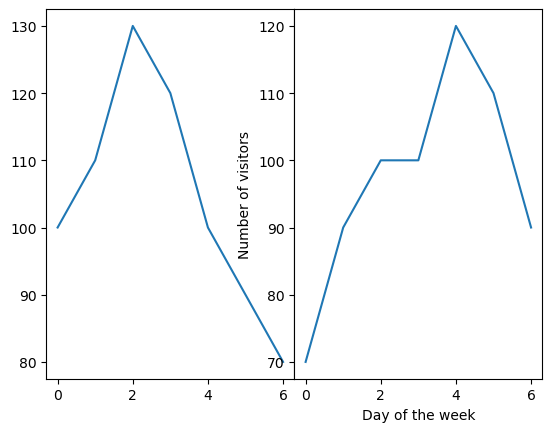

In [3]:
np.random.seed(0)
time_series_0 = np.array([100, 110, 130, 120, 100, 90, 80])
time_series_1 = np.array([70, 90, 100, 100, 120, 110, 90])
fig, axs = plt.subplots(1, 2)
axs[0].plot(time_series_0)
axs[1].plot(time_series_1)
plt.subplots_adjust(wspace = 0)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

Text(0, 0.5, 'Number of visitors')

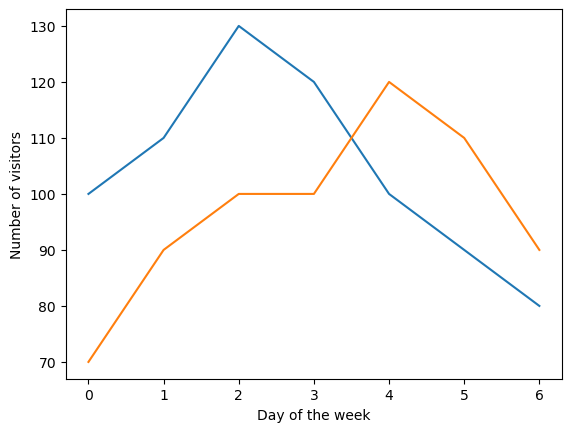

In [4]:
plt.plot(time_series_0)
plt.plot(time_series_1)
plt.xlabel("Day of the week")
plt.ylabel("Number of visitors")

ADVANTAGES AND DISADVANTAGES OF BOTH PLOTS

Method 1: Side-by-side Subplots
    Advantages:
        - Clear separation: Makes it easier to compare the shape and trend of each week's data independently.
        - Useful if scales or patterns differ dramatically, so one line doesn’t visually dominate the other.
        - Allows separate labeling or annotations, if needed later.
    Disadvantages:
        - Harder to directly compare exact values for each day, since you must look back and forth between the plots.
        - Takes up more space (less efficient in layout).
        - Risk of misalignment if axis scaling is inconsistent (e.g., different y-axis limits).

Method 2: Single Overlaid Plot
    Advantages:
        - Allows direct comparison of both weeks’ visitor numbers on the same scale.
        - Easy to spot day-to-day differences or trends across weeks.
        - More compact and often visually cleaner, especially for short time series like this.
    Disadvantages:
        - Can get cluttered if the lines overlap or cross each other too much.
        - Viewers might confuse which line represents which week unless colors/labels are added.
        - May obscure subtle differences in shape or peaks if the values are close.

# 3. Working on your datasets

This week, you can work on Milestone Two rather than having a particular exercise about working on your datasets

Dataset Shape: (3795, 55)

Missing Values:
 All Fatalities                    3787
Public Fatalities                 3787
Other Fatalities                  3787
Emergency Responder Fatalities    3787
Operator Contractor Fatalities    3787
Operator Employee Fatalities      3787
Other Injuries                    3783
All Injuries                      3783
Public Injuries                   3783
Operator Employee Injuries        3783
dtype: int64

Summary Statistics:
                                        count unique  \
Report Number                           3795   3795   
Supplemental Number                   2795.0    NaN   
Accident Year                         3795.0    NaN   
Accident Date/Time                      2795   2777   
Operator ID                           3795.0    NaN   
Operator Name                           2795    229   
Pipeline/Facility Name                  3674   2950   
Pipeline Location                       3795   1001   
Pipeline Type                       

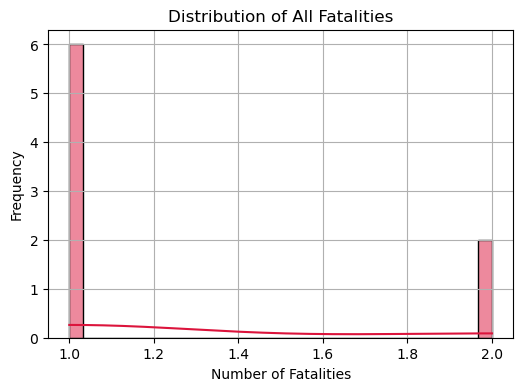

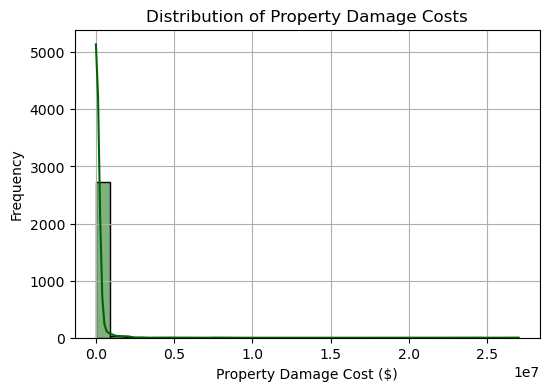

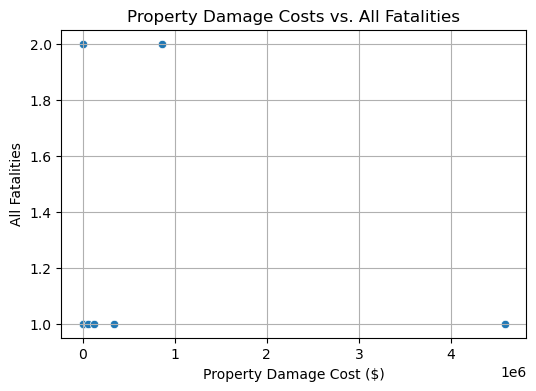

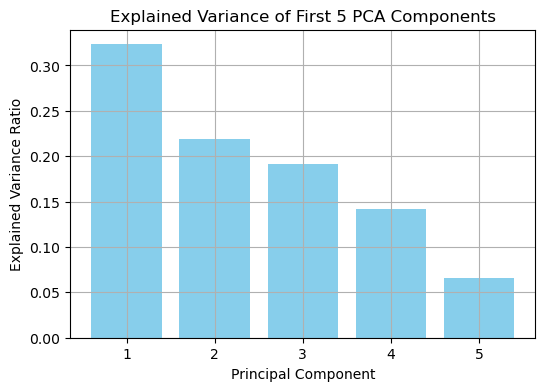

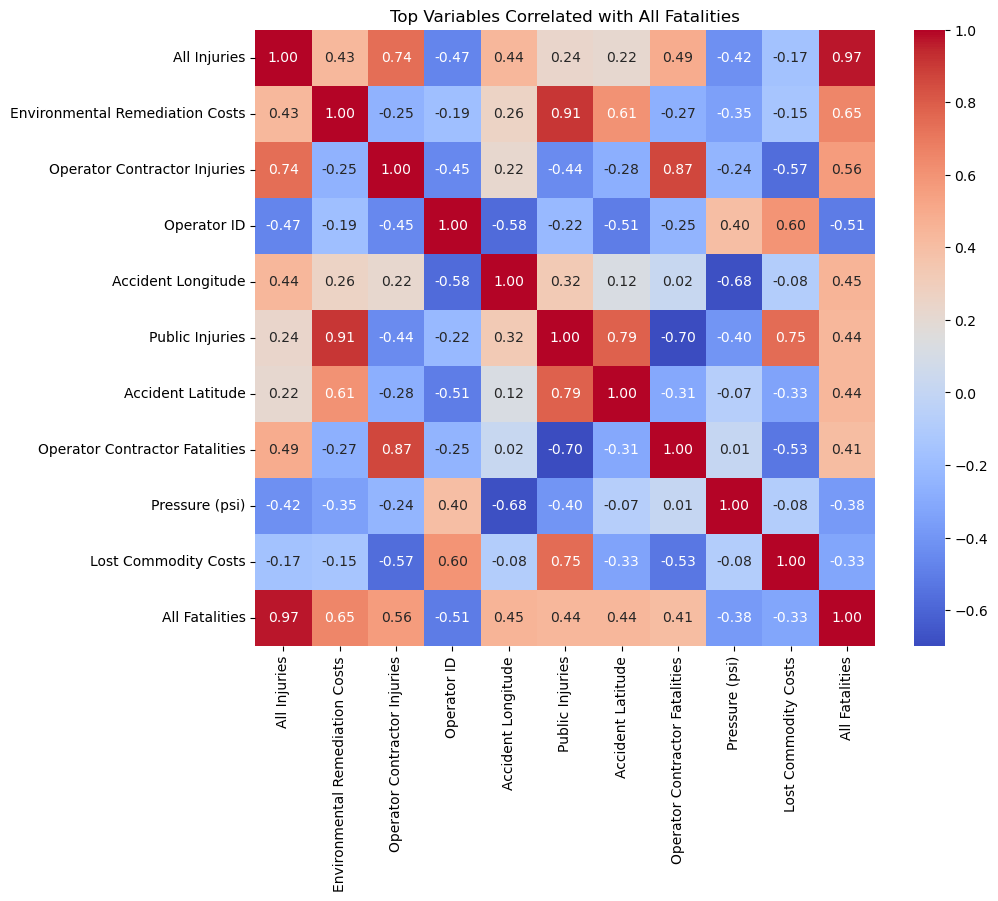

C:\Users\micha\AppData\Local\Temp\ipykernel_29988\3245302292.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances.values, y=top_importances.index, palette="viridis")


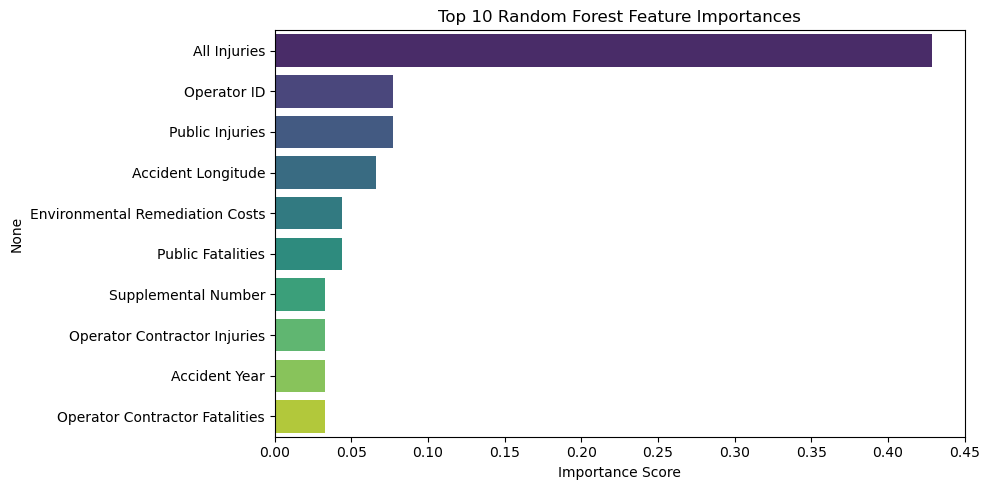

Cross-validated R²: nan ± nan


c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\micha\.ipython\profile_default\log\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df = pd.read_csv("pipeline_accidents.csv")

# Exploratory Data Analysis (EDA)

print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum().sort_values(ascending=False).head(10))
print("\nSummary Statistics:\n", df.describe(include='all').T)

# Plot Distribution of All Fatalities
plt.figure(figsize=(6, 4))
sns.histplot(df['All Fatalities'].dropna(), bins=30, kde=True, color='crimson')
plt.title("Distribution of All Fatalities")
plt.xlabel("Number of Fatalities")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot Distribution of Property Damage Costs
if 'Property Damage Costs' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Property Damage Costs'].dropna(), bins=30, kde=True, color='darkgreen')
    plt.title("Distribution of Property Damage Costs")
    plt.xlabel("Property Damage Cost ($)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# Scatter Plot: Property Damage Costs vs. All Fatalities
if 'Property Damage Costs' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='Property Damage Costs', y='All Fatalities', data=df)
    plt.title("Property Damage Costs vs. All Fatalities")
    plt.xlabel("Property Damage Cost ($)")
    plt.ylabel("All Fatalities")
    plt.grid(True)
    plt.show()

df['Accident Date/Time'] = pd.to_datetime(df['Accident Date/Time'], errors='coerce')
df['Shutdown Date/Time'] = pd.to_datetime(df['Shutdown Date/Time'], errors='coerce')
df['Restart Date/Time'] = pd.to_datetime(df['Restart Date/Time'], errors='coerce')
df['Last Maintenance Date'] = pd.to_datetime(df['Last Maintenance Date'], errors='coerce')

target = 'All Fatalities'

numeric_df = df.select_dtypes(include=['float64', 'int64']).copy()

numeric_df = numeric_df.dropna(subset=[target])

# Fill Missing Values
imputer = SimpleImputer(strategy='mean')
numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Standardize Data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_imputed.drop(columns=[target]))

# Principal Component Analysis (PCA)

pca = PCA()
pca_components = pca.fit_transform(scaled_data)

# Plot Explained Vriance (first 5 components)
plt.figure(figsize=(6, 4))
plt.bar(range(1, 6), pca.explained_variance_ratio_[:5], color='skyblue')
plt.xticks(range(1, 6))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance of First 5 PCA Components')
plt.grid(True)
plt.show()

# Correlation Heatmap (Top 10 variables correlated with All Fatalities)
corr_matrix = numeric_df.corr()
top_corr = corr_matrix[target].abs().sort_values(ascending=False).drop(target).head(10)
top_features = top_corr.index.tolist()

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_features + [target]].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Top Variables Correlated with {target}')
plt.show()

# Random Forest Regression

X = numeric_df_imputed.drop(columns=[target])
y = numeric_df_imputed[target]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Select Top 10 Feature Importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_importances = importances.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_importances.values, y=top_importances.index, palette="viridis")
plt.title("Top 10 Random Forest Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# Cross-Validated R² Score
cv_r2 = cross_val_score(rf, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {cv_r2.mean():.4f} ± {cv_r2.std():.4f}")

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 187-205 of the Storytelling With Data book as best you can. (Chapter Eight). You do not have to get the exact data values right, just the overall look and feel.

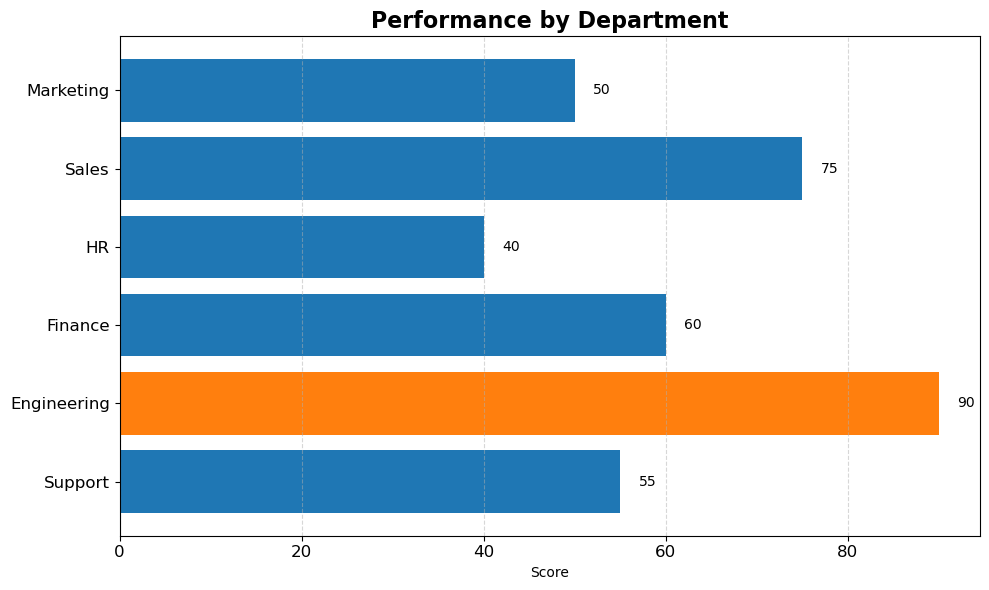

In [5]:
# Sample Data
categories = ['Marketing', 'Sales', 'HR', 'Finance', 'Engineering', 'Support']
values = [50, 75, 40, 60, 90, 55]

highlight = 'Engineering'

colors = ['#1f77b4' if cat != highlight else '#ff7f0e' for cat in categories]

plt.figure(figsize=(10, 6))
bars = plt.barh(categories, values, color=colors)

# Style
plt.title("Performance by Department", fontsize=16, weight='bold')
plt.xlabel("Score")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.gca().invert_yaxis()

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f'{values[i]}', va='center', fontsize=10)

plt.tight_layout()
plt.show()